# Exercices sur les points simples

Objectif : programmer en python

- une fonction pour les connectivités
- une fonction pour les 4-simples
- une fonction pour les 8-simples

In [1]:
#matrice de l'exercice de cours

# oooooooooooo
# oooooooooooo
# oooooxxxxooo
# ooxxxxxxxxoo
# ooooxxxxxooo
# oooxxxxxoooo
# oooooooooooo
# oooooooooooo

matrice = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# réponses pour cette matrice

simple4 = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0],
           [0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0],
           [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
           [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

simple8 = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
           [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0],
           [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
def show_image(mat):
    cmap = ListedColormap(['gray','white', 'black'])
    plt.imshow(mat, cmap=cmap, norm=BoundaryNorm([-1.5, -0.5, 0.5, 1.5], cmap.N))
    plt.xticks(range(len(mat[0])))
    plt.yticks(range(len(mat)))
    plt.gca().set_xticks([i + 0.5 for i in range(len(mat[0]))], minor=True)
    plt.gca().set_yticks([i + 0.5 for i in range(len(mat))], minor=True)
    plt.grid(True, which="minor", color="gray", linestyle='--', linewidth=0.5)
    plt.show()

def show_petite_matrice(mat3x3):
    mat = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    for i in range(3):
        for j in range(3):
            mat[i][j] = mat3x3[i][j][0]
    show_image(mat)

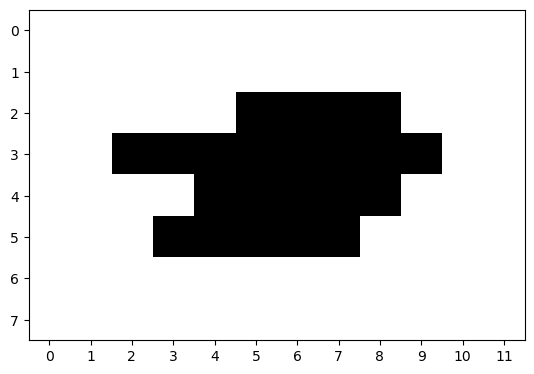

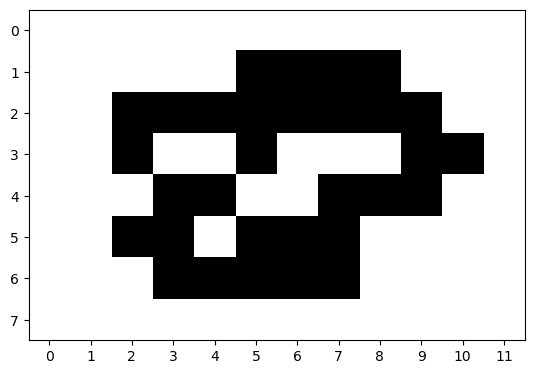

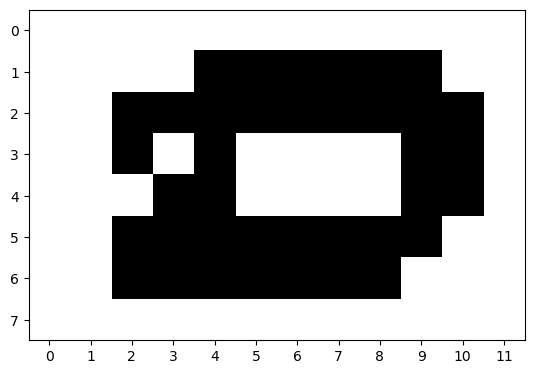

In [3]:
show_image(matrice)
show_image(simple4)
show_image(simple8)

simple point

mat.
point matrice : recup matrice 3x3 avec des -1 aux bords et au milieu et partout tuple visited false ou true(-1)
-1 -1 -1
-1 -1  0
-1  1  1

tovisit.
4/8, 0/1, mat : recup liste tuple à visiter 4v1 ou 4v0 ou 8v1 ou 8v0 ex les coordonnées dans cette matrice des voisins qui sont des 1 parmi les 4v (non lus)
bd,f  b,f

nextvisit.
point, mat, 4/8 : recup les 4v (donc les 2) du point dans la 3x3 qui doivent être visités cad meme val (0ou1)et non visité
arg point : on commence dans la liste précédente donc val soit 0 soit 1
1 1 : [ 1 0 ]

parcours dfs init.
tovisit : prend le premier point de tovisit, le marque comme lu, et applique dfsrécu sur les next visit. À la fin regarde si tovisit a été entièrement visité. S'il reste un false alors not connex

dfsrécu.
point: dfsrécu(tout nextvisit(p))

In [ ]:
def petite_matrice(point, X) :
    """Renvoie la matrice 3x3 centrée en point et indique si les points doit être visité
    (-1, False) si le point n'existe pas (bord) et ne doit pas être visité dans le suite de l'algorithme
    @param point: tuple (i,j) coordonnées du point
    @param X: matrice binaire qui correspond à l'image"""

    i,j = point
    mat3x3 = [[(-1, False),(-1, False),(-1, False)], [(-1, False),(-1, False),(-1, False)], [(-1, False),(-1, False),(-1, False)]]
    for k in range(-1,2):
        for l in range(-1,2):
            if 0 <= i+k < len(X) and 0 <= j+l < len(X[0]):
                mat3x3[k+1][l+1] = (X[i+k][j+l], True)
    return mat3x3

In [ ]:
def to_visit(alpha, val, mat3x3) :
    """Récup la liste des pixels à visiter en fonction de la valeur (val) du pixel central et du type de voisinage (alpha)"""
    v = []
    # haut gauche
    if alpha == 8 and mat3x3[0][0][0] == val and mat3x3[0][0][1]:
        v.append(mat3x3[0][0])
    # haut
    if mat3x3[0][1][0] == val and mat3x3[0][1][1]:
        v.append(mat3x3[0][1])
    # haut droite
    if alpha == 8 and mat3x3[0][2][0] == val and mat3x3[0][2][1]:
        v.append(mat3x3[0][2])
    # droite
    if mat3x3[1][2][0] == val and mat3x3[1][2][1]:
        v.append(mat3x3[1][2])
    # bas droite
    if alpha == 8 and mat3x3[2][2][0] == val and mat3x3[2][2][1]:
        v.append(mat3x3[2][2])
    # bas
    if mat3x3[2][1][0] == val and mat3x3[2][1][1]:
        v.append(mat3x3[2][1])
    # bas gauche
    if alpha == 8 and mat3x3[2][0][0] == val and mat3x3[2][0][1]:
        v.append(mat3x3[2][0])
    # gauche
    if mat3x3[1][0][0] == val and mat3x3[1][0][1]:
        v.append(mat3x3[1][0])
    
    return v

nextvisit.
point, mat, 4/8 : recup les 4v (donc les 2) du point dans la 3x3 qui doivent être visités cad meme val (0ou1)et non visité
arg point : on commence dans la liste précédente donc val soit 0 soit 1
1 1 : [ 1 0 ]

In [ ]:
def voisins(point, mat3x3, alpha):
    """Renvoie la liste des voisins du point dans la matrice 3x3
    @param point: tuple (i,j) coordonnées du point
    @param mat3x3: matrice 3x3 centrée en point
    @param alpha: 4 ou 8 pour le type de voisinage"""
    i,j = point
    #val = mat3x3[1][1][0]
    #return to_visit(alpha, val, mat3x3)

parcours dfs init.
tovisit : prend le premier point de tovisit, le marque comme lu, et applique dfsrécu sur les next visit. À la fin regarde si tovisit a été entièrement visité. S'il reste un false alors not connex

In [ ]:
def is_connex():
    pass

dfsrécu.
point: dfsrécu(tout nextvisit(p))

In [ ]:
def is_connex_recursif():
    pass

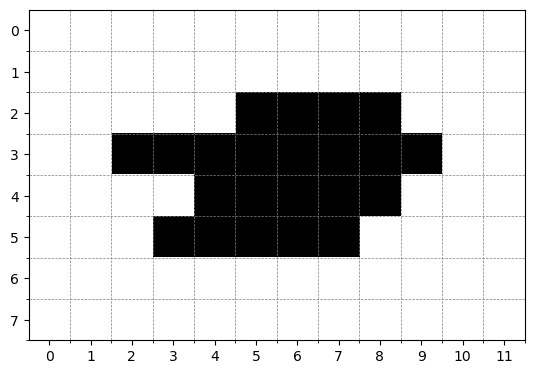

[[(-1, True), (-1, True), (-1, True)], [(-1, True), (0, False), (0, False)], [(-1, True), (0, False), (0, False)]]


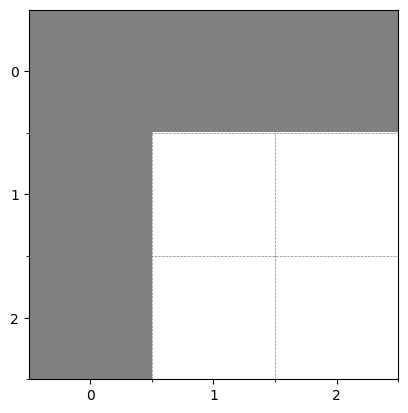

In [29]:
show_image(matrice)
mat3x3 = petite_matrice((0,0), matrice)
print(mat3x3)
show_petite_matrice(mat3x3)

In [ ]:
def neighbors4(point, mat):
    """List of 4 neighbors of point=(x, y) in matrix mat
    (top, right, bottom, left)"""
    x, y = point
    voisins = []
    voisins.append(matrice[y-1][x] if y-1 >= 0 else 0)          # haut
    voisins.append(matrice[y][x+1] if x+1 < len(mat[0]) else 0) # droite
    voisins.append(matrice[y+1][x] if y+1 < len(mat) else 0)    # bas
    voisins.append(matrice[y][x-1] if x-1 >= 0 else 0)          # gauche
    return voisins


def neighbors8(point, mat):
    """List of 8 neighbors of point=(x, y) in matrix mat
    (top-left, clockwise)"""
    x, y = point
    voisins = []
    voisins.append(matrice[y-1][x-1] if y-1 >= 0 and x-1 >= 0 else 0)                   # haut-gauche
    voisins.append(matrice[y-1][x] if y-1 >= 0 else 0)                                  # haut
    voisins.append(matrice[y-1][x+1] if y-1 >= 0 and x+1 < len(mat[0]) else 0)          # haut-droite
    voisins.append(matrice[y][x+1] if x+1 < len(mat[0]) else 0)                         # droite
    voisins.append(matrice[y+1][x+1] if y+1 < len(mat) and x+1 < len(mat[0]) else 0)    # bas-droite
    voisins.append(matrice[y+1][x] if y+1 < len(mat) else 0)                            # bas
    voisins.append(matrice[y+1][x-1] if y+1 < len(mat) and x-1 >= 0 else 0)             # bas-gauche
    voisins.append(matrice[y][x-1] if x-1 >= 0 else 0)                                  # gauche
    return voisins



In [ ]:
def T4(p, matrice):
    voisins = neighbors4(p, matrice)
    # on fait le tour des voisins circulairement
    voisins_circ = voisins + [voisins[0]]
    transitions = 0
    for i in range(4):
        if voisins_circ[i] == 0 and voisins_circ[i+1] == 1:
            transitions += 1
    return transitions



In [ ]:
def is_4_simple(x, y, mat):
    